In [17]:

import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###
import pystan
from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

import stylised_facts_data_utilities.createLOB as createLOB

%matplotlib inline
import os
os.getcwd()


'/home/ak/Documents/Research/PaperCode/stylised_facts'

In [18]:
createLOB.Volestim?

In [19]:
# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs

from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 777



In [20]:

# def select_sample_data(ref, sub, price_col, date):
#     '''
#     select a sample of data based on date, assumes datetimeindex
    
#     # args
#         ref: pd.DataFrame containing all ticks
#         sub: subordinated pd.DataFrame of prices
#         price_col: str(), price column
#         date: str(), date to select
#     # returns
#         xdf: ref pd.Series
#         xtdf: subordinated pd.Series
#     '''
#     xdf = ref[price_col].loc[ref[str(date)]
#     xtdf = sub[price_col].loc[date]
#     return xdf, xtdf

In [21]:
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
folderList
clocksDataList =[s for s in folderList if ('ClocksData') in s]
correlDataList =[s for s in folderList if ('AtoCor') in s]

In [22]:
idxFile = 20
fileLoc = "".join((folder, clocksDataList[idxFile]))
symbolID =fileLoc.split("_")[1:3]
symbolText=("".join((symbolID[0]," ", symbolID[1])))

In [23]:
fileLoc

'/media/ak/My Passport/Experiment Data/ActivityClockData/ClocksData_G_1_Comdty_20180504_.pkl'

In [24]:
import pickle 
pickle_to_file = pickle.load(open(fileLoc, "rb"))

In [25]:
keys = pickle_to_file.keys()

In [26]:
keys

dict_keys(['OriginalDF', 'TickBarDf', 'VolumeBarDf', 'DollarVolumeBarDf'])


def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['End','Start','Open','High','Low','Close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

In [27]:
column='MicroPrice'
ref=pickle_to_file[list(keys)[0]][str(column)]
sub=pickle_to_file[list(keys)[1]][str(column)]

In [28]:
# plotTimeSeries(5, ohlcDF, window=10, rollingWindow=100)

In [29]:

def sim_ema(ticks_adj, tick_window=20):
    # to it in real time as in the simulation...
    sim_ema = pd.Series( index=ticks_adj.index )

    # define our accumulator for the average
    accum = 0
    alpha = 2 / ( tick_window + 1 )
    # loop
    for index, value in ticks_adj.items():
        if pd.isna( value ):
            continue
        if accum == 0:
            accum = value
        else:
            accum = ( alpha * value ) + ( 1 - alpha ) * accum
        sim_ema.loc[ index ] = accum
        return sim_ema
# # sim_ema.plot(color='r')


In [30]:
def autoCorrelDict(ticks_adj):
    autoCorrelDict ={}
    for i in np.arange( 1, 500 ):
        autoCorrelDict[i]=ticks_adj.autocorr( lag = i )
    return autoCorrelDict
    

In [1]:
# from stylised_facts.stylised_facts_data_utilities import mdfda

In [32]:
os.getcwd()
''' Locations'''
cwd= os.getcwd()
extHD = '/media/ak/My Passport/'
extHdData = "".join((extHD, 'Data'))
extHdExpData = "".join((extHD, 'Experiment Data')) #['features', 'labels', 'metrics', 'models']
extHdFutures = "".join((extHD, 'Barket Data/raw bloomberg data')) #futures
bmrg_folders=[s for s in os.listdir(extHdFutures) if ('Comdty') in s]

In [33]:
os.listdir(extHdExpData)
cleanLOBFolder = "/".join((extHdExpData,'CleanLOBData'))
symbols =sorted(os.listdir(cleanLOBFolder))

In [34]:
symbolIdx = 0
symbolCleanSymbolFolder = "/".join((cleanLOBFolder, symbols[symbolIdx]))
symbolCleanFilesList = os.listdir(symbolCleanSymbolFolder)

In [35]:
dfTest =pd.read_csv("/".join((symbolCleanSymbolFolder,symbolCleanFilesList[0])))

In [36]:
dfTest.columns.values

array(['Unnamed: 0', 'BidQuoteId', 'BidSize', 'QuoteTime', 'type_x',
       'BestBid', 'TradeTime', 'AskQuoteId', 'AskSize', 'time_y',
       'type_y', 'BestAsk', 'TradeId', 'TradeSize', 'TradedTime', 'type',
       'TradePrice', 'TradeId.1', 'TimeStamp', 'milliSeconds', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPrice',
       'MicroPricePctChange', 'FwdMPChange_1', 'FwdMPChange_5',
       'LogTradeSize'], dtype=object)

In [37]:
dfTestCopy = dfTest.copy(deep=True)

In [38]:
dfGrouped = dfTestCopy.groupby('TradeTime')['BidSize', 'AskSize', 'TradeSize']
dfGroupedSum = dfGrouped.sum()
#this needs to be a function I think

In [39]:
dfMergedtEST =dfTestCopy.merge(dfGroupedSum, on='TradeTime')

In [40]:
dfTestCase = dfMergedtEST.drop(columns=['Unnamed: 0','type_x','type_y','AskQuoteId','BidQuoteId'])

In [41]:
os.listdir(extHdFutures)
bmrg_folders=[s for s in os.listdir(extHdFutures) if ('Comdty') in s]
# bmrg_trades=sorted([s for s in os.listdir(dataOnlyDrive) if s.endswith('y_trades')])
# bmrg_quotes=sorted([s for s in os.listdir(dataOnlyDrive) if s.endswith('y_quotes')])
# bmrg_tickers=sorted([bmrg_trades[idx].split('_t')[0] for idx,_ in enumerate(bmrg_trades)])

In [42]:
test=createLOB.rawLOBFIle(futuresFolder=extHdFutures, symbolsFolder=bmrg_folders, symbolID=1,fileID=15)
# test.shape
# testLOB= dfTestCopy
test.head(5)

,Unnamed: 0,size,time,type,value
0,0,0,2018-05-09 06:30:00.002,BID,158.93
1,1,0,2018-05-09 06:30:00.002,ASK,159.23
2,2,0,2018-05-09 06:30:00.130,ASK,159.22
3,3,0,2018-05-09 06:30:00.544,ASK,159.21
4,4,0,2018-05-09 06:30:01.009,ASK,159.20


In [43]:
LOB =createLOB.createLOB(test)
LOB.head(4)

,Unnamed: 0_x,size_x,time_x,type_x,value_x,TradeTime,Unnamed: 0_y,size_y,time_y,type_y,value_y,Unnamed: 0,size,time,type,value,TradeId
0,0,0,2018-05-09 06:30:00.002,BID,158.93,2018-05-09 06:30:00.002,1,0,2018-05-09 06:30:00.002,ASK,159.23,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0,2018-05-09 06:30:06.377,BID,159.00,2018-05-09 06:30:06.377,5,0,2018-05-09 06:30:01.592,ASK,159.19,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,2018-05-09 06:30:50.101,BID,159.10,2018-05-09 06:30:50.101,7,0,2018-05-09 06:30:34.211,ASK,159.18,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1,2018-05-09 06:31:00.132,BID,159.10,2018-05-09 06:31:00.132,11,1,2018-05-09 06:31:00.132,ASK,159.16,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dfraw = createLOB.calcLOB(createLOB.formatLOB(LOB))
dfraw.columns.values

array(['BidQuoteId', 'BidSize', 'QuoteTime', 'type_x', 'BestBid',
       'TradeTime', 'AskQuoteId', 'AskSize', 'time_y', 'type_y',
       'BestAsk', 'TradeId', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TradeId', 'TimeStamp', 'milliSeconds',
       'DollarVolume', 'MicroPrice', 'TradeSize', 'Duration',
       'PriceChange', 'LogReturn', 'BidOffer', 'MicroPricePctChange',
       'FwdMPChange_1', 'FwdMPChange_5', 'LogTradeSize'], dtype=object)

In [45]:
dfraw.tail(4)

,BidQuoteId,BidSize,QuoteTime,type_x,BestBid,TradeTime,AskQuoteId,AskSize,time_y,type_y,...,MicroPrice,TradeSize,Duration,PriceChange,LogReturn,BidOffer,MicroPricePctChange,FwdMPChange_1,FwdMPChange_5,LogTradeSize
215,609,1,2018-05-09 15:00:58.044,BID,159.05,2018-05-09 15:00:58.044,607,1,2018-05-09 15:00:00.114,ASK,...,159.120,1.0,57895.0,0.0,0.0,0.14,-0.000094,-0.000094,-0.000188,0.0
216,610,1,2018-05-09 15:00:58.045,BID,158.93,2018-05-09 15:00:58.045,611,1,2018-05-09 15:00:58.045,ASK,...,159.065,1.0,1.0,0.0,0.0,0.27,-0.000346,-0.000094,-0.000025,0.0
217,614,1,2018-05-09 20:32:20.000,BID,158.93,2018-05-09 20:32:20.000,615,1,2018-05-09 20:32:20.000,ASK,...,159.065,1.0,19881955.0,0.0,0.0,0.27,0.000000,-0.000346,0.000088,0.0
218,612,1,2018-05-09 20:32:20.642,BID,0.00,2018-05-09 20:32:20.642,613,1,2018-05-09 20:32:20.642,ASK,...,0.000,1.0,642.0,0.0,0.0,0.00,-1.000000,0.000000,0.000063,0.0


In [46]:
activityClocks = createLOB.Clocks(dfraw, 'MicroPrice', 'TradeVolume','DollarVolume',1,5,5)

In [47]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [48]:
volume_M =1 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(dfraw, 'TradeVolume', volume_M)

100%|██████████| 219/219 [00:00<00:00, 444389.25it/s]

volume threshold: 1


In [49]:
dfVolDf= createLOB.calcLOB(activityClocks.volume_bar_df())
dfTickDf= createLOB.calcLOB(activityClocks.tick_bar_df())
dfDVDF = createLOB.calcLOB(activityClocks.dollar_bar_df())

100%|██████████| 219/219 [00:00<00:00, 1066843.87it/s]


In [50]:
dict={}
dict['VolumeClockDf']=activityClocks.volume_bar_df()
dict['TickClockDf']=activityClocks.tick_bar_df()
dict['DollarVolumeClockDf']=activityClocks.tick_bar_df()



100%|██████████| 219/219 [00:00<00:00, 643694.87it/s]


In [51]:
microPricePctChange = dfTickDf.MicroPrice.pct_change().dropna()

Estimating distributions parameters...
norm (-0.0045875621659956815, 0.06757338924291435)
laplace (2.0447452828994122e-07, 0.004751454005002096)
cauchy (2.6476252824068078e-06, 0.0001121618869662084)


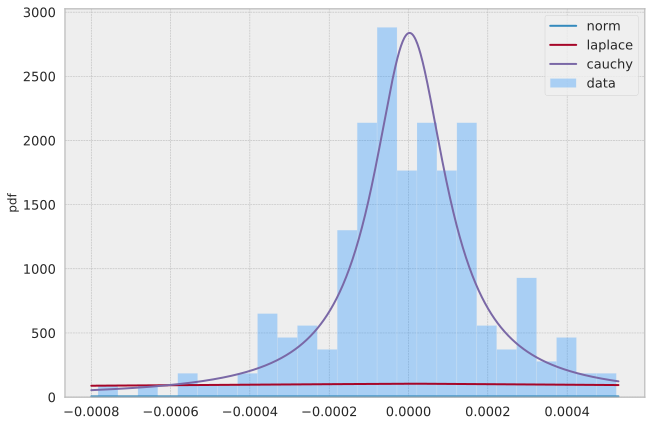

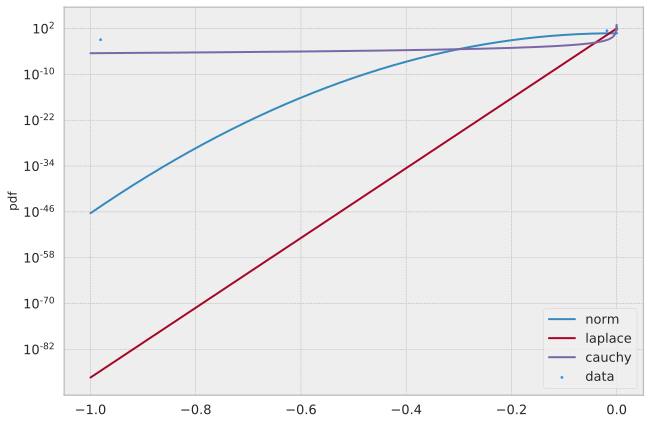

{'norm': (-0.0045875621659956815, 0.06757338924291435),
 'laplace': (2.0447452828994122e-07, 0.004751454005002096),
 'cauchy': (2.6476252824068078e-06, 0.0001121618869662084)}

In [52]:
import numpy as np
import longtail

x = microPricePctChange 
longtail.plot(x)

Estimating distributions parameters...
norm (-8.734536909371235, 129.01031627687902)
laplace (0.010614852421393806, 9.54992845893069)
cauchy (0.01677885663922271, 0.6154596793250526)


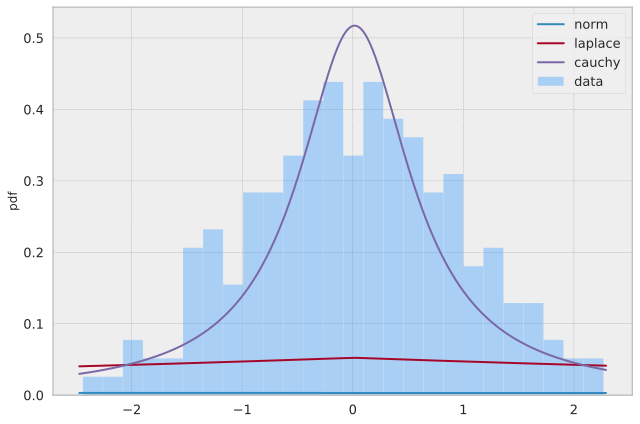

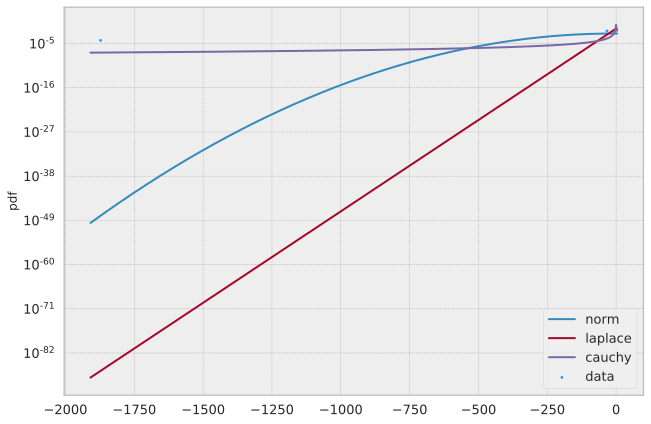

{'norm': (-8.734536909371235, 129.01031627687902),
 'laplace': (0.010614852421393806, 9.54992845893069),
 'cauchy': (0.01677885663922271, 0.6154596793250526)}

In [53]:
scaler = longtail.GaussianScaler()
x_ = scaler.fit_transform(x)
longtail.plot(x_)

In [54]:
longtail.stats?

In [75]:
symbolID=1
futuresFolder= extHdFutures
symbolsFolder=bmrg_folders
listDatesFiles = os.listdir("/".join((futuresFolder, symbolsFolder[symbolID])))
symbol=symbolsFolder[symbolID].split("_")[0]

In [76]:
for symbolIDX, _ in enumerate(symbolsFolder):
    noFiles = len(os.listdir())
    print(symbolsFolder[symbolIDX], symbolIDX)
    

DU1_Comdty-20181028 0
FB1_Comdty-20181028 1
FV1_Comdty-20181028 2
G_1_Comdty-20181028 3
JB1_Comdty-20181028 4
KE1_Comdty-20181028 5
OE1_Comdty-20181028 6
RX1_Comdty-20181028 7


In [77]:

testLOB =(createLOB.createLOB(rawLOBFile = test))
cleanLOB =createLOB.formatLOB(testLOB)
cleanLOBDate = str(pd.to_datetime(cleanLOB.QuoteTime[0]).date())

In [78]:
from stylised_facts_data_utilities import createLOB as createLOB


In [79]:
cleanLOBDateFileName = "_".join(('LOB',str(symbol),cleanLOBDate+".csv"))

In [80]:
cleanLOBDateFileName
cleanLOBFileLoc = "/".join((cleanLOBFolder,symbol ,cleanLOBDateFileName))

In [81]:
# cleanLOB.to_csv(cleanLOBFileLoc)

In [82]:
# cleanLOB.columns.values

In [83]:
cleanLOB['TimeStamp']=pd.to_datetime(cleanLOB.TradeTime).dt.time
cleanLOB['milliSeconds'] = [(((x.hour * 60 + x.minute) * 60 + x.second) * 1000) for x in cleanLOB['TimeStamp']]

In [84]:
listDatesFiles = ("/".join((futuresFolder, symbolsFolder[symbolID])))
rawLOBFile = pd.read_csv("/".join((futuresFolder, symbolsFolder[symbolID], listDatesFiles[symbolID])))

FileNotFoundError: [Errno 2] File b'/media/ak/My Passport/Barket Data/raw bloomberg data/FB1_Comdty-20181028/m' does not exist: b'/media/ak/My Passport/Barket Data/raw bloomberg data/FB1_Comdty-20181028/m'

In [85]:
dfLOB['TradedDollarVolume'] =dfLOB.TradeSize*dfLOB.TradePrice
cleanLOB['TradedDollarVolume'] =cleanLOB.TradeSize*dfLOB.TradePrice

NameError: name 'dfLOB' is not defined

## Volume Bars ##

In [86]:
n_ticks = testLOB.shape[0]
volume_ratio = (testLOB.TradeSize.sum()/n_ticks).round()
dollar_ratio = (testLOB.DollarVolumeTraded.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

AttributeError: 'DataFrame' object has no attribute 'TradeSize'

In [3]:
import numpy as np

In [4]:
t_final= np.array(np.max(clocks.tick_bar_df().shape[0], clocks.volume_bar_df().shape[0], clocks.dollar_bar_df().shape[0]))
delta_t=1 #tick

NameError: name 'clocks' is not defined

In [78]:
# The time array of the trajectory
time = np.arange(0, t_final, delta_t)
# y = np.asarray(clocks.tick_bar_df().MicroPricePctChange)

NameError: name 't_final' is not defined

In [ ]:
#This is the stochastic trajectory over time
plt.plot( y_tick, label = r'Trajectory of MicroPrice Pct Change')
plt.plot(y_dv, color='r')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

In [ ]:
# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.logspace(0.7, 4, 60).astype(int)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 9

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

In [ ]:
plt.plot(lag, dfa)

In [ ]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]
plt.show()
# Now what you should obtain is: slope = H + 1

In [ ]:
# Lets take three examples, with H=0.3, H=0.5, H=0.7
# The total integration time, as before
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

# Generate three fractional Gaussian noises dB 
H_anti = 0.3       # Anti-presistent noise
H_regu = 0.5       # Regular noise
H_posi = 0.7       # Positively correlated noise

# Generate the noises (with the appropriate normalisation)
dB_anti = (t_final ** H_anti) * fgn(N = time.size, H = H_anti)
dB_regu = (t_final ** H_regu) * fgn(N = time.size, H = H_regu)
dB_posi = (t_final ** H_posi) * fgn(N = time.size, H = H_posi)

In [ ]:
# # Let's plot the noises, and the associated motions

# fig, ax = plt.subplots(2,3, figsize=(12,4));

# ax[0,0].plot(time, dB_anti)
# ax[0,1].plot(time, dB_regu)
# ax[0,2].plot(time, dB_posi)

# # their motions are given by the integral of the noise,
# # i.e., the cumsum of the processew 

# ax[1,0].plot(time, np.cumsum(dB_anti))
# ax[1,1].plot(time, np.cumsum(dB_regu))
# ax[1,2].plot(time, np.cumsum(dB_posi))

In [ ]:
import os
def require(fname):
    if not os.path.exists(fname):
        from urllib import urlretrieve
        print ('Downloading %s.')%fname
        urlretrieve('http://bsp.brain.riken.jp/~juricap/mdfa/%s'%fname,fname)
    if fname.endswith('.zip'):
        import zipfile
        try:
            zipfile.ZipFile(fname).extractall()
        except Exception as exc:
            print( exc)


plt.rcParams['figure.figsize'] = (14,8)
from scipy.io import loadmat
from numpy import cumsum, polyfit, polyval, mean, sqrt
import matplotlib.pyplot as plt 
SAVE = False

In [ ]:
RW1=np.cumsum(y-np.mean(y));
A = 10.0

In [ ]:
np.ma.array?

In [ ]:
plt.plot(A*y)
plt.plot(RW1,'r',lw=1.5)

In [ ]:
from numpy import cumsum
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,color='r',linestyle='--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
    plt.ylabel(label,ha='center')
#     if title: plt.text(100,500,title,fontsize=12) 

scale = 1000
RW = cumsum(y-y.mean())

plt.subplot(311)
plt.title('A Linear detrending')
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending')
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubig detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')

In [ ]:
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')

In [ ]:
def trends(X,scale,m=1):
    t = np.arange(X.shape[0])
    segments = np.arange(0,X.shape[0]-scale+1,scale)
    RMS = []
    for i0 in segments:
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0)
        RMS.append( sqrt(((X[i0:i1]-fit)**2).mean()) )
    return np.array(RMS)

RW = cumsum(y-y.mean())
scales = 2**np.arange(4,11)
#[16,32,64,128,256,512,1024];
m = 1



In [ ]:
import time

In [ ]:
from stylised_facts.stylised_facts_data_utilities import mdfda as mdfda

In [ ]:
X =np.arange(9000)
# mdfda.rw(X,4,3)
type(y)

In [ ]:
scstep = 8
t0 = time.clock()
scales = np.floor(2.0**np.arange(4,10.1,1.0/scstep)).astype('i4')
RW = mdfda.rwalk(y.ravel())

RMS = mdfda.compRMS(RW,scales,1)
dtslow = time.clock() - t0
print ('Took %0.3fs'%dtslow)

In [ ]:
# qstep = 4
# qs = np.arange(-5,5.01,1.0/qstep)
# Fq = mdfda.compFq(RMS,qs)

# plt.subplot(121)
# plt.plot(scales[::scstep//2],Fq[::scstep//2,::qstep],'.-',lw=0.1)
# plt.gca().set_xscale('log')
# gca().set_yscale('log')
# Hq = zeros(len(qs),'f8')
# for qi,q in enumerate(qs):
#     C = polyfit(log2(scales),log2(Fq[:,qi]),1)
#     Hq[qi] = C[0]
#     if abs(q - int(q)) > 0.1: continue
#     loglog(scales,2**polyval(C,log2(scales)),lw=0.5,label='q=%d [H=%0.2f]'%(q,Hq[qi]))
# margins(0,0)
# legend(loc='lower right')
# plt.xticks(scales[::scstep],scales[::scstep]);
# plt.yticks([0.1,1.0,10.0],[0.1,1.0,10.0])
# plt.xlabel('scale')
# plt.ylabel('Fq')

# plt.subplot(122)
# tq = Hq*qs - 1
# hq = diff(tq)/(qs[1]-qs[0])
# Dq = (qs[:-1]*hq) - tq[:-1]
# plot(hq,Dq,'.-')
# xlabel('hq'); ylabel('Dq')

### Volume Clock ###

In [ ]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [ ]:
dfLOB.columns.values

In [ ]:
volume_M =5 

In [ ]:
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(dfLOB, 'TradeSize', volume_M)


In [ ]:
v_bar_df.shape

In [ ]:
clocks.volume_bar_df().shape

In [ ]:
import cprint
from cprint import *

In [ ]:
dfLOB.MicroPrice.loc[3]

In [ ]:
dfLOB.columns.values

In [ ]:
dfLOB.TradedTime.values

In [ ]:
x= dfLOB.MicroPricePctChange.values

In [ ]:
import powerlaw

In [ ]:
fit =powerlaw.Fit(x)

In [ ]:
print(fit.alpha)
print(fit.sigma)

In [ ]:
data= x
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")


In [ ]:
# fit = powerlaw.Fit(data, discrete=True)
# ####
# fit.distribution_compare('power_law', 'lognormal')
# fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
# fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
# fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
# ####
# fig.set_ylabel(u"p(X≥x)")
# fig.set_xlabel("Frequency")
# handles, labels = fig.get_legend_handles_labels()
# fig.legend(handles, labels, loc=3)

In [ ]:
absMPchange = np.abs(v_bar_df.MicroPricePctChange).dropna()

In [ ]:
x=(np.abs(v_bar_df.MicroPricePctChange)/v_bar_df.Duration).dropna()

In [ ]:
v_bar_df

In [ ]:
x[~np.isfinite(x)] = 0

In [ ]:
x = 1000000*x

In [ ]:
x2=x.drop(x.idxmax())

In [ ]:
activity =x[x<1]
activity.describe()

In [ ]:
#This is the stochastic trajectory over time
plt.plot(x, label = r'MicroPrice Pct Change/Duration')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

In [ ]:
activity.hist(bins=50, label='activity')

In [ ]:
ticks = np.sign(dfLOB.TradePrice -dfLOB.TradePrice.shift(1) )
ticks_adj = ticks.copy()

In [ ]:
def ticks(df):
    ticks = np.sign(df.TradePrice -df.TradePrice.shift(1) )
    ticks_adj = ticks.copy().replace(to_replace=0, method='ffill')
    return tick_adj
def ema(ticks_adj, tick_window =20):
    '''
    returns exponential moving average of ticks, for a predefined window
    '''
    ema = ticks_adj.ewm( span=tick_window ).mean()
    return ema

In [ ]:
ticks_adj = ticks.replace(to_replace=0, method='ffill')

In [ ]:
ticks_adj.tail(20)

In [ ]:
# Calculate autocorrelation for n lags 
fig, ax1 = plt.subplots(figsize=(16,9))
for i in np.arange( 1, 1000 ):
    ax1.bar( i, ticks_adj.autocorr( lag = i ), color = 'blue' )
ax1.set_title( 'Autocorrelation of tick test data by lag' )
ax1.set_ylabel( 'Autocorrelation' )
ax1.set_xlabel( 'Lag' )
plt.show()

In [ ]:
# Calculate our signal: collect trades - we'll use tick count

# determine our window size
tick_window = 20

# Calc EMA directly (alpha = 2 / span +1)
ema = ticks_adj.ewm( span=tick_window ).mean()


In [ ]:
ema.plot()

In [ ]:
from numpy import r_
def trends(X,scale,m=1):
    t = np.arange(X.shape[0])
    segments = np.arange(0,X.shape[0]-scale+1,scale)
    RMS = []
    for i0 in segments:
        i1 = i0+scale
        t0 = t[i0:i1]
        C = polyfit(t0,X[i0:i1],m)
        fit = polyval(C,t0)
        RMS.append( sqrt(((X[i0:i1]-fit)**2).mean()) )
    return np.array(RMS)

RW = cumsum(ema-ema.mean())
scales = 2**np.arange(4,11)
#[16,32,64,128,256,512,1024];
m = 1

plt.figure(figsize=(14,10))
RMS = {}
for si, scale in enumerate(scales):
    plt.subplot(len(scales),1,len(scales)-si)
    t = np.arange(0,RW.shape[0]+1,scale)
    RMS[scale] = trends(RW,scale,m)
    plt.step(t,r_[RMS[scale],RMS[scale][-1]],where='post')
    plt.plot(xlim(),r_[1,1]*RMS[scale].mean(),'r',lw=2.0)
    plt.text(8100,RMS[scale].mean(),'Scale = %d'%scale)
    if scale < 128:
        yticks([0,5,10,20])
    else:
        yticks([0,10,20,40])

plt.xlabel('Sample index')
plt.subplot(len(scales),1,len(scales)//2+1)
plt.ylabel('Amplitude')

In [ ]:
def sim_ema(ticks_adj):
    # to it in real time as in the simulation...
    sim_ema = pd.Series( index=ticks_adj.index )

    # define our accumulator for the average
    accum = 0
    alpha = 2 / ( tick_window + 1 )
    # loop
    for index, value in ticks_adj.items():
        if pd.isna( value ):
            continue
        if accum == 0:
            accum = value
        else:
            accum = ( alpha * value ) + ( 1 - alpha ) * accum
        sim_ema.loc[ index ] = accum
        return sim_ema

In [ ]:
sim_ema.plot(color='r')
plt.show()

In [ ]:
values = pd.concat([sim_ema, ema], axis=1)
values.columns = ['sim_ema', 'ema']

In [ ]:

(values.sim_ema - values.ema).head(200).plot()

In [ ]:
RW1=np.cumsum(ema-np.mean(ema));
A = 10.0
t_final= len(ema)
delta_t=1 #tick
# The time array of the trajectory
time = np.arange(0, t_final, delta_t)


In [ ]:
y=ema
scale = 1000
RW = cumsum(y-y.mean())
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(311)
plt.title('A Linear detrending')
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending')
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubic detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')
plt.subplots_adjust(hspace=0.5)